In [1]:
# General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , Normalizer  , OneHotEncoder , LabelEncoder , MinMaxScaler , RobustScaler
from sklearn.cluster import KMeans , DBSCAN , AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from src.utils import silhouette_analysis
from scipy.stats import mstats
import os



loading .env file
Connected to MongoDB database


In [2]:
file_path=os.path.join(os.getcwd() , "dataset/cleaned_customer_dataset.csv")
df=pd.read_csv(file_path)
df.head()

,Education,Marital_Status,Income,Recency,wines,fruits,meat,fist,sweets,golds,...,Z_CostContact,Z_Revenue,Response,month_enroll,year_enroll,Generation,Age,Childrens,Compaigns_Engagement,Income_to_Spending_Ratio
0,Undergraduate,Alone,58138.0,58.0,635.0,79.5,546.0,120.5,81.0,88.0,...,3.0,11.0,0.0,9.0,2013.0,Baby Boomers,68.0,0.0,0.0,35.954236
1,Undergraduate,Alone,46344.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,...,3.0,11.0,0.0,3.0,2013.0,Baby Boomers,71.0,2.0,0.0,969.270750
2,Undergraduate,Partner,71613.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,...,3.0,11.0,0.0,8.0,2013.0,Gen X,60.0,0.0,0.0,92.284794
3,Undergraduate,Partner,26646.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,...,3.0,11.0,0.0,2.0,2013.0,Millennials,41.0,1.0,0.0,502.754717
4,PhD,Partner,58293.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,...,3.0,11.0,0.0,1.0,2013.0,Millennials,44.0,1.0,0.0,138.135071


### **Preprocessing**

In [3]:
no_variance_features=['year_enroll','AcceptedCmp5','AcceptedCmp3','AcceptedCmp4','AcceptedCmp1' ,'AcceptedCmp2' ,'Z_CostContact','Complain' , 'Z_Revenue' ,'Response' ]
df.drop(no_variance_features , axis=1 , inplace=True)

In [4]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'wines', 'fruits',
       'meat', 'fist', 'sweets', 'golds', 'DealsPurchases', 'onlinePurchases',
       'CatalogPurchases', 'StorePurchases', 'NumWebVisitsMonth',
       'month_enroll', 'Generation', 'Age', 'Childrens',
       'Compaigns_Engagement', 'Income_to_Spending_Ratio'],
      dtype='object')

In [5]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=="O"]
numericals_features=[feature for feature in df.columns if df[feature].dtype!="O"]
print(f"Categorical Features {categorical_features}\n")
print(f"Numericals Features {numericals_features}")

Categorical Features ['Education', 'Marital_Status', 'Generation']

Numericals Features ['Income', 'Recency', 'wines', 'fruits', 'meat', 'fist', 'sweets', 'golds', 'DealsPurchases', 'onlinePurchases', 'CatalogPurchases', 'StorePurchases', 'NumWebVisitsMonth', 'month_enroll', 'Age', 'Childrens', 'Compaigns_Engagement', 'Income_to_Spending_Ratio']


In [6]:
print(df[numericals_features].describe())

              Income      Recency        wines       fruits         meat  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    51874.493231    49.012635   303.272789    21.569043   151.268389   
std     21059.740890    28.948352   331.811951    26.923702   179.016404   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000    24.000000    24.000000     2.000000    16.000000   
50%     51381.500000    49.000000   174.500000     8.000000    68.000000   
75%     68522.000000    74.000000   505.000000    33.000000   232.250000   
max    118350.500000    99.000000  1226.500000    79.500000   556.625000   

              fist       sweets        golds  DealsPurchases  onlinePurchases  \
count  2216.000000  2216.000000  2216.000000     2216.000000      2216.000000   
mean     32.189079    21.950812    39.497518        2.216155         4.067690   
std      40.411139    27.539044    39.874746        1.536238         2.6

In [7]:
for col in categorical_features:
    print(f"{col} uniques lables {df[col].unique()}\n")

Education uniques lables ['Undergraduate' 'PhD' 'Postgraduate']

Marital_Status uniques lables ['Alone' 'Partner']

Generation uniques lables ['Baby Boomers' 'Gen X' 'Millennials' 'Silent Generation']



In [8]:
encoder=OneHotEncoder(sparse_output=False ,drop="first")
encoded_features=encoder.fit_transform(df[categorical_features])
encoded_df=pd.DataFrame(encoded_features , columns=encoder.get_feature_names_out())
df_encoded=pd.concat([df , encoded_df] , axis=1)

In [9]:
df_encoded=df_encoded.drop(categorical_features , axis=1)

### **K-means Clustering**

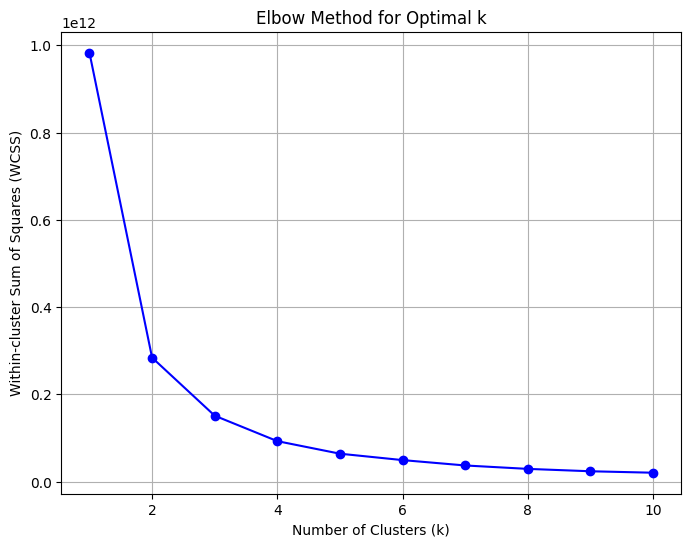

In [10]:
# Range of cluster values to try (you can adjust this based on your data)
k_range = range(1, 11)  # Test for k values between 1 and 10
wcss = []  # List to store the WCSS values

# Loop over each k value to compute WCSS
for k in k_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(df_encoded)  # Fit KMeans on the data
    wcss.append(kmeans.inertia_)  # Append the WCSS value to the list

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [11]:
def evaluate_kmeans(data, max_clusters=10):
    results = []
    
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        
        # Compute evaluation metrics
        silhouette = silhouette_score(data, labels)
        dbi = davies_bouldin_score(data, labels)
        chi = calinski_harabasz_score(data, labels)
        
        results.append((k, silhouette, dbi, chi))
        print(f"Clusters: {k} | Silhouette: {silhouette:.4f} | DBI: {dbi:.4f} | CHI: {chi:.4f}")
    
    return pd.DataFrame(results, columns=["Clusters", "Silhouette", "DBI", "CHI"])

# Run evaluation
Kmeans_results = evaluate_kmeans(df_encoded, max_clusters=10)


Clusters: 2 | Silhouette: 0.6083 | DBI: 0.5208 | CHI: 5449.7250
Clusters: 3 | Silhouette: 0.5445 | DBI: 0.5481 | CHI: 6102.3676
Clusters: 4 | Silhouette: 0.5320 | DBI: 0.5549 | CHI: 7093.7452
Clusters: 5 | Silhouette: 0.5288 | DBI: 0.5465 | CHI: 7968.4360
Clusters: 6 | Silhouette: 0.5083 | DBI: 0.5730 | CHI: 8413.7799
Clusters: 7 | Silhouette: 0.5208 | DBI: 0.5573 | CHI: 9467.2018
Clusters: 8 | Silhouette: 0.5191 | DBI: 0.5559 | CHI: 10398.0910
Clusters: 9 | Silhouette: 0.5145 | DBI: 0.5338 | CHI: 11455.5122
Clusters: 10 | Silhouette: 0.5149 | DBI: 0.5110 | CHI: 12759.5363


### **DBSCAN Clustering**

In [12]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=3)  # You can adjust `eps` and `min_samples`
dbscan_labels = dbscan.fit_predict(df_encoded)

# Calculate silhouette score
score = silhouette_score(df_encoded, dbscan_labels)
print(f"Silhouette Score: {score}")


Silhouette Score: -0.8176313199899676


### **Agglomerative Clustering**

In [13]:
for k in range(2, 11):
    agg_clust = AgglomerativeClustering(n_clusters=k)
    labels = agg_clust.fit_predict(df_encoded)
    silhouette = silhouette_score(df_encoded, labels)
    ch_index = calinski_harabasz_score(df_encoded, labels)
    db_index = davies_bouldin_score(df_encoded, labels)

    print(f"Clusters: {k} | Silhouette: {silhouette:.4f} | DBI: {db_index:.4f} | CHI: {ch_index:.4f}")


Clusters: 2 | Silhouette: 0.5931 | DBI: 0.5229 | CHI: 5023.1293
Clusters: 3 | Silhouette: 0.5154 | DBI: 0.5487 | CHI: 5479.6165
Clusters: 4 | Silhouette: 0.5189 | DBI: 0.5577 | CHI: 6384.9383
Clusters: 5 | Silhouette: 0.5140 | DBI: 0.5468 | CHI: 7460.9193
Clusters: 6 | Silhouette: 0.5108 | DBI: 0.5614 | CHI: 7899.2702
Clusters: 7 | Silhouette: 0.4942 | DBI: 0.5541 | CHI: 8683.8207
Clusters: 8 | Silhouette: 0.4891 | DBI: 0.5575 | CHI: 8992.3243
Clusters: 9 | Silhouette: 0.4898 | DBI: 0.5616 | CHI: 9673.7424
Clusters: 10 | Silhouette: 0.4904 | DBI: 0.4986 | CHI: 10870.9698


For n_clusters = 2, The average silhouette_score is: 0.6083


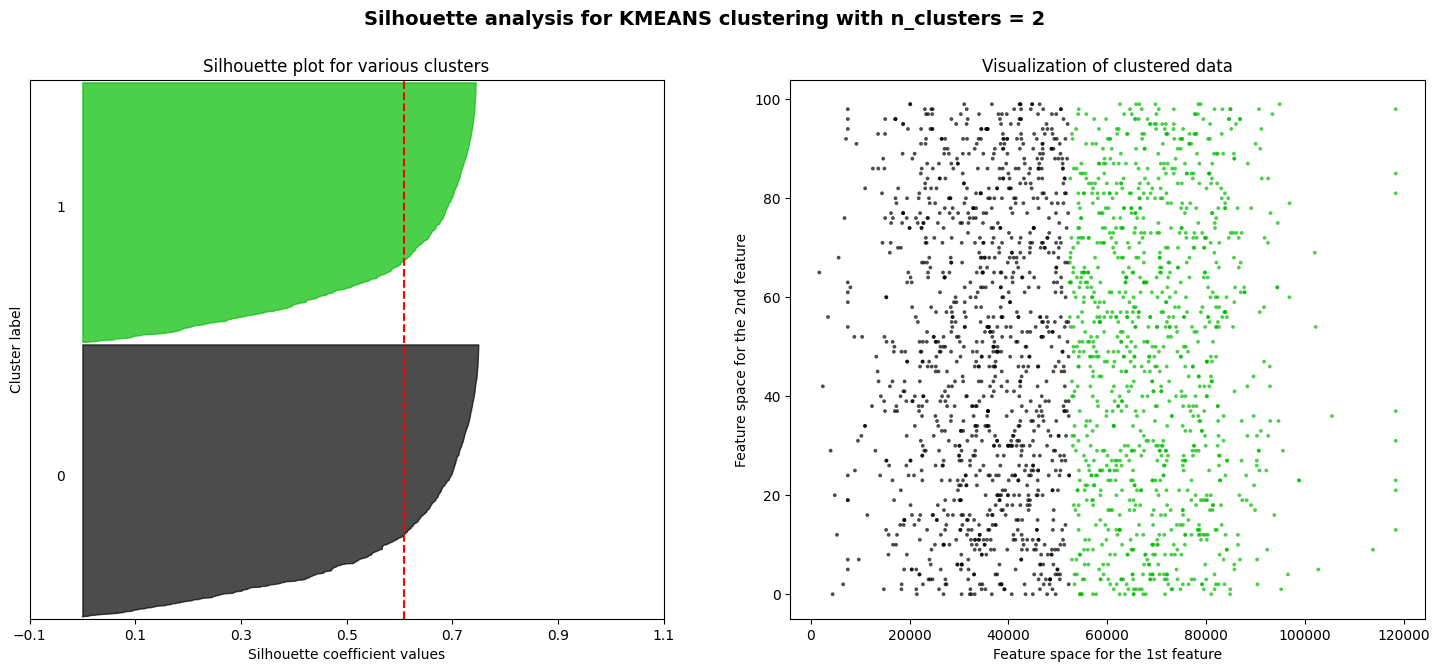

For n_clusters = 3, The average silhouette_score is: 0.5445


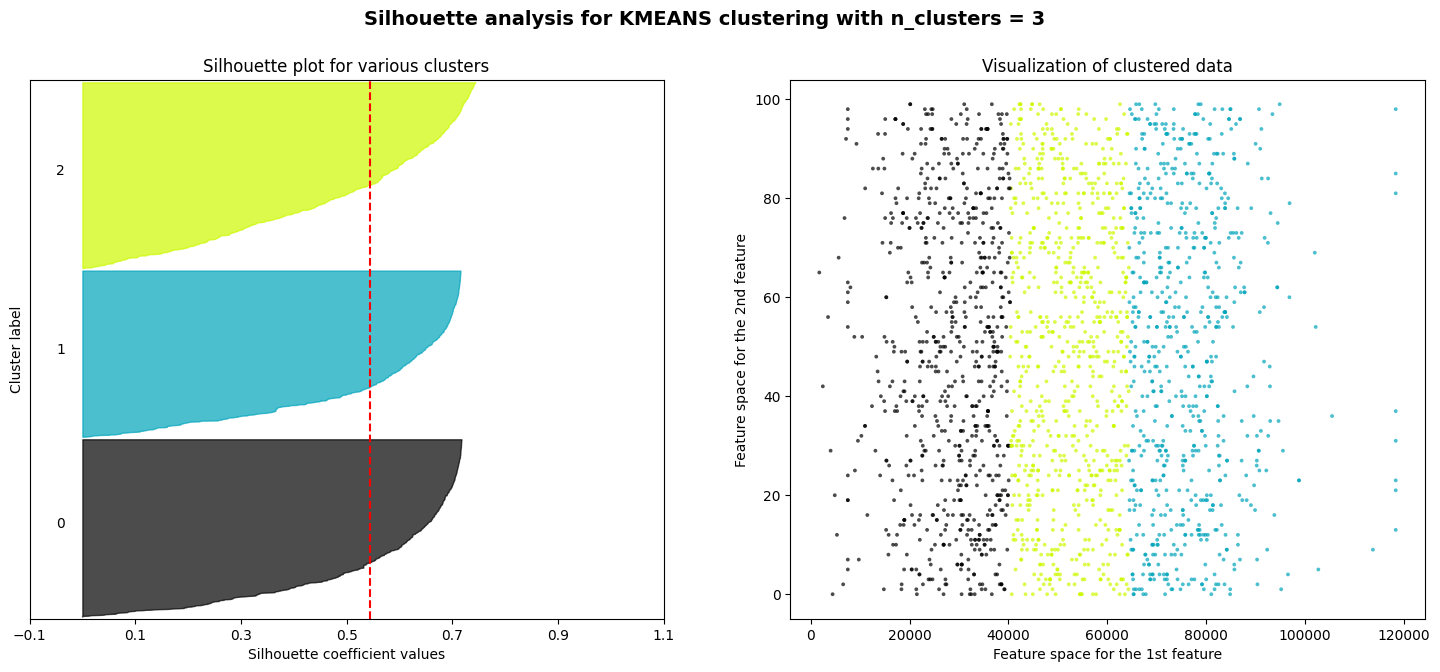

For n_clusters = 4, The average silhouette_score is: 0.5320


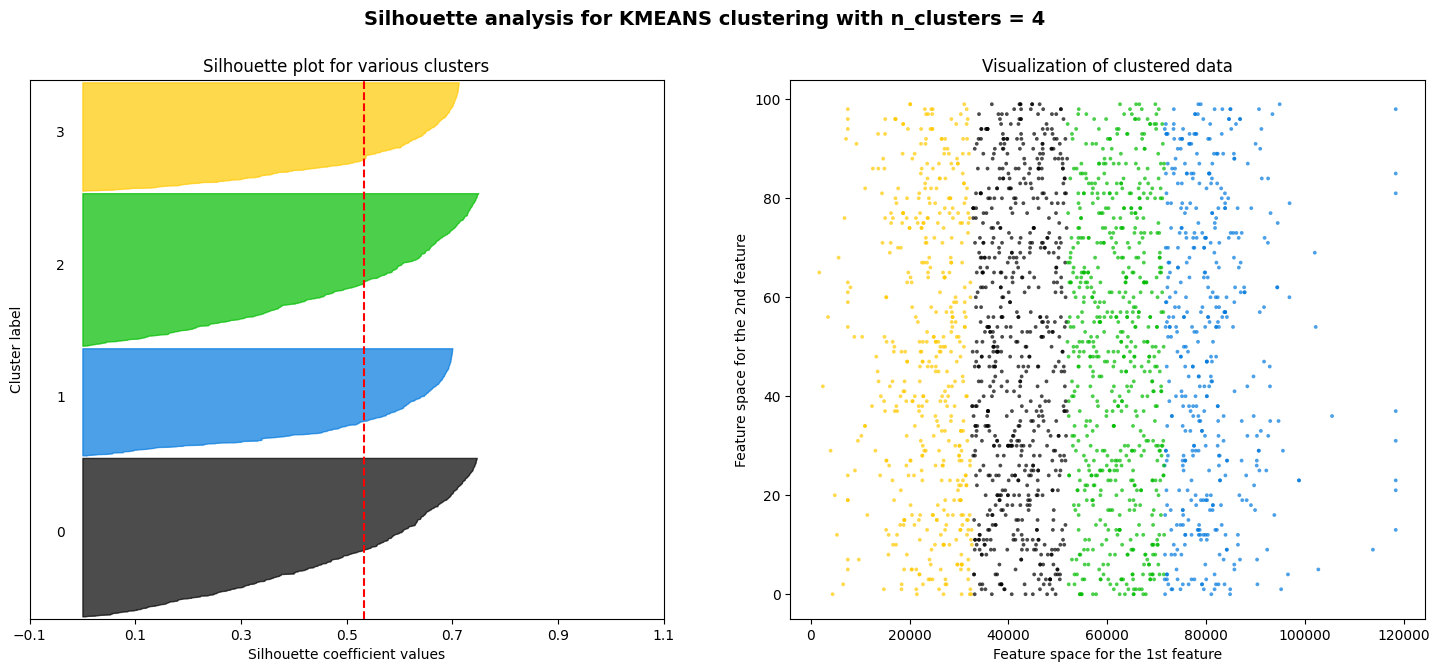

For n_clusters = 5, The average silhouette_score is: 0.5288


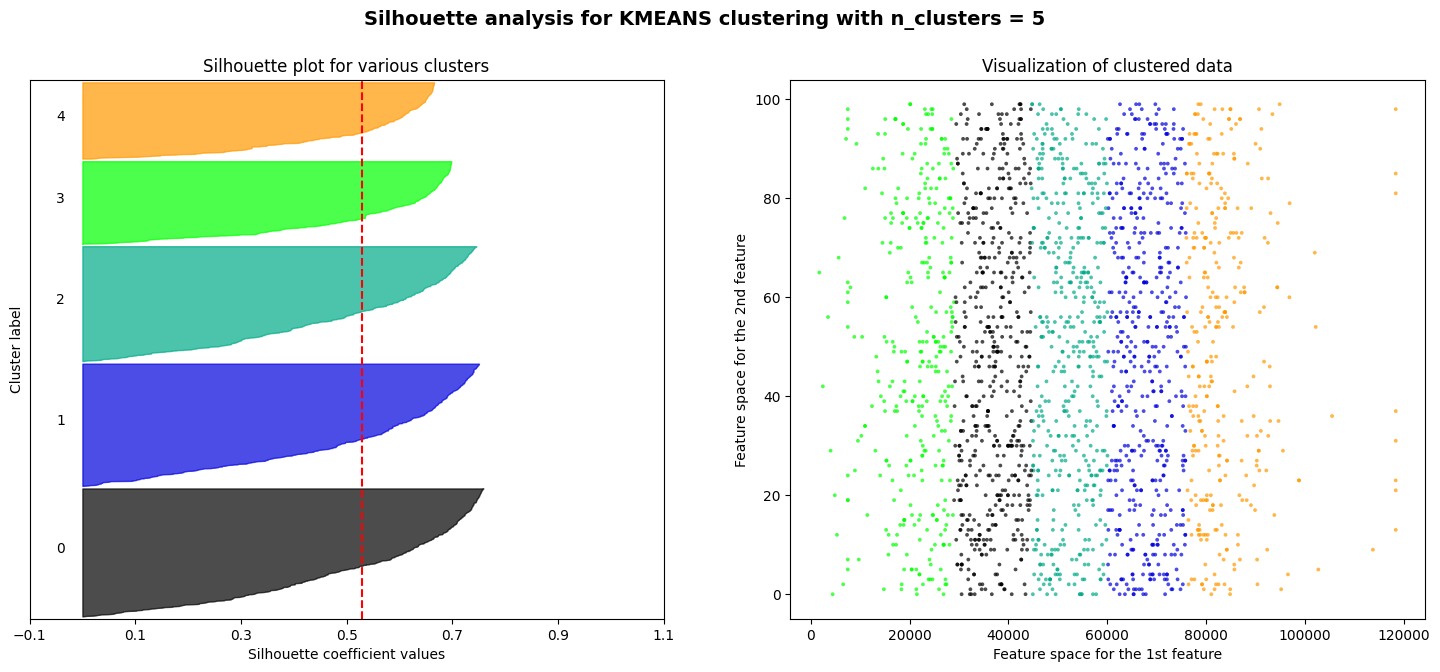

For n_clusters = 6, The average silhouette_score is: 0.5083


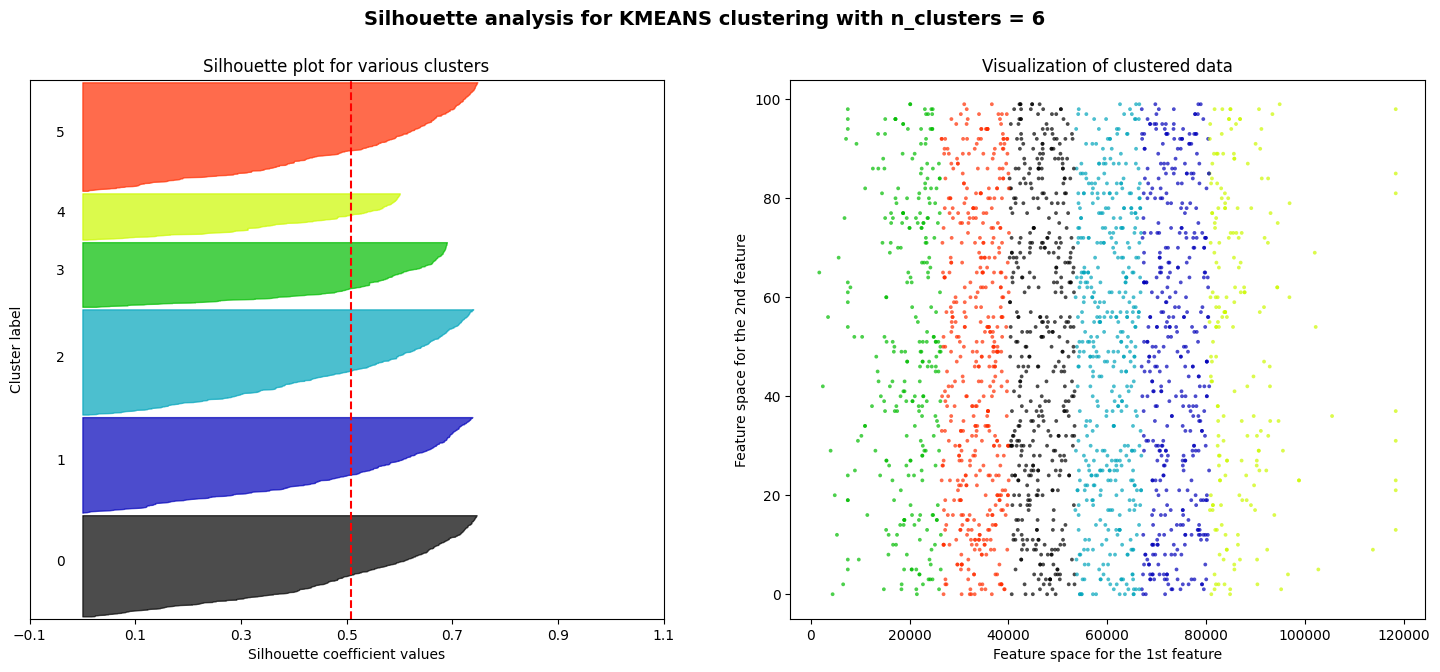

In [14]:
cluster_results=silhouette_analysis(df=df_encoded , model="kmeans")

## **HyperParameter Tuning**

For n_clusters = 2, The average silhouette_score is: 0.5931


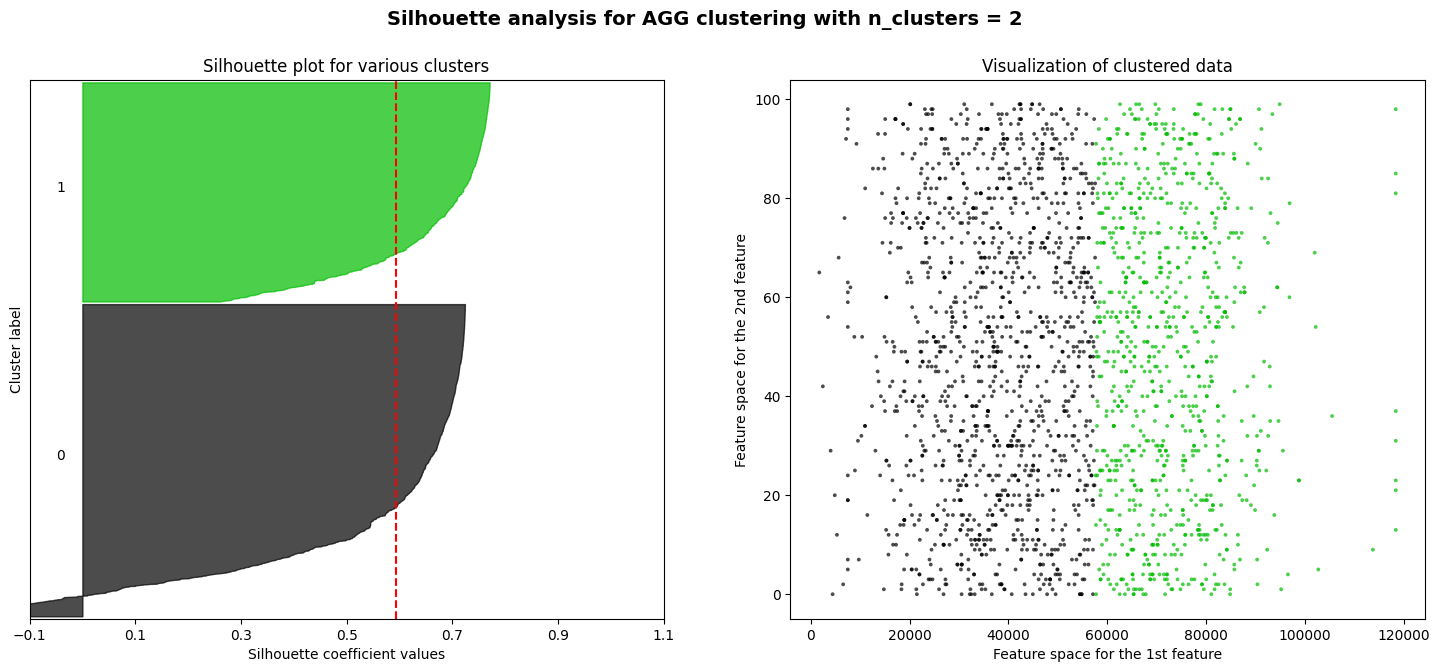

For n_clusters = 3, The average silhouette_score is: 0.5154


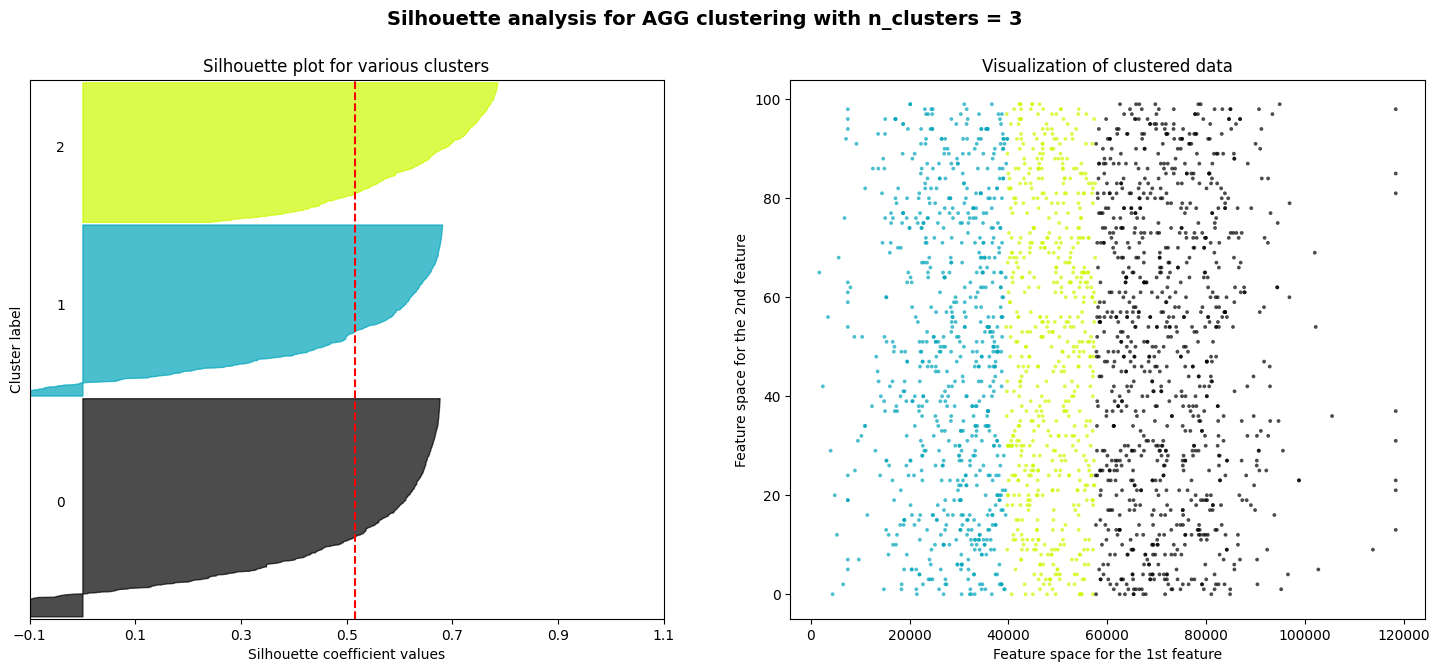

For n_clusters = 4, The average silhouette_score is: 0.5189


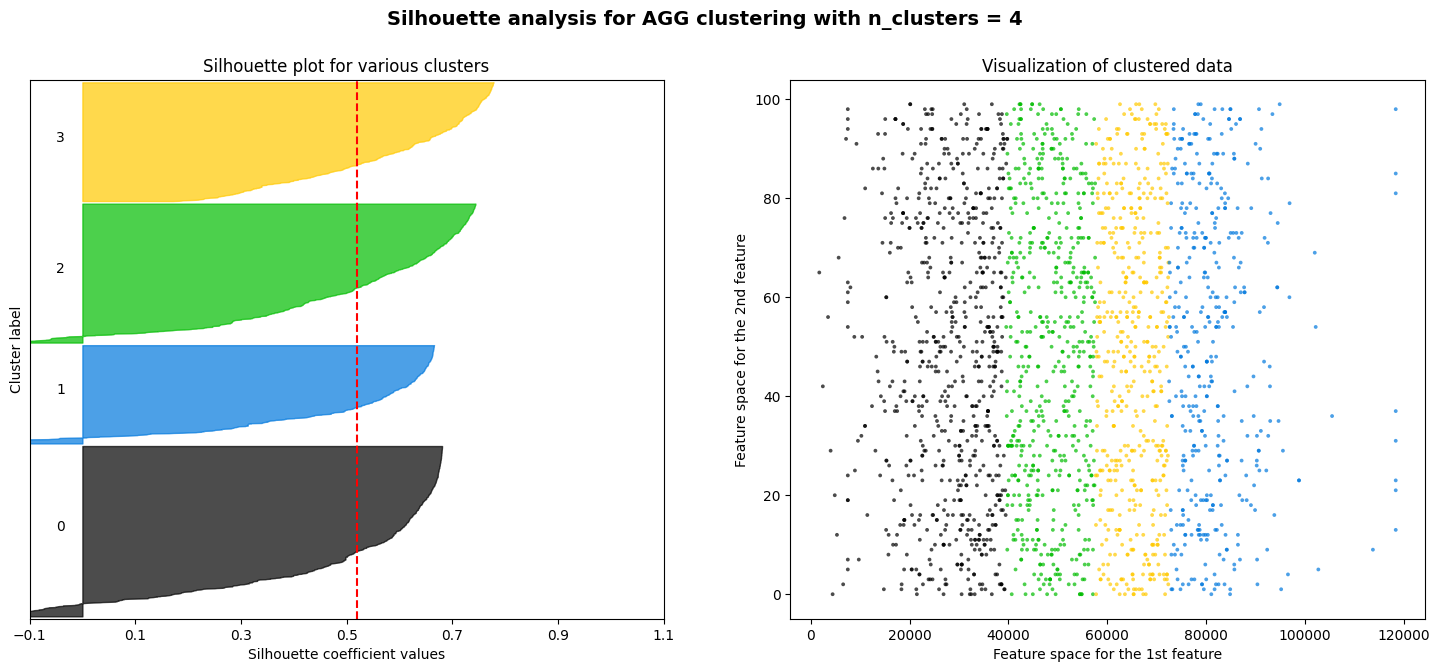

For n_clusters = 5, The average silhouette_score is: 0.5140


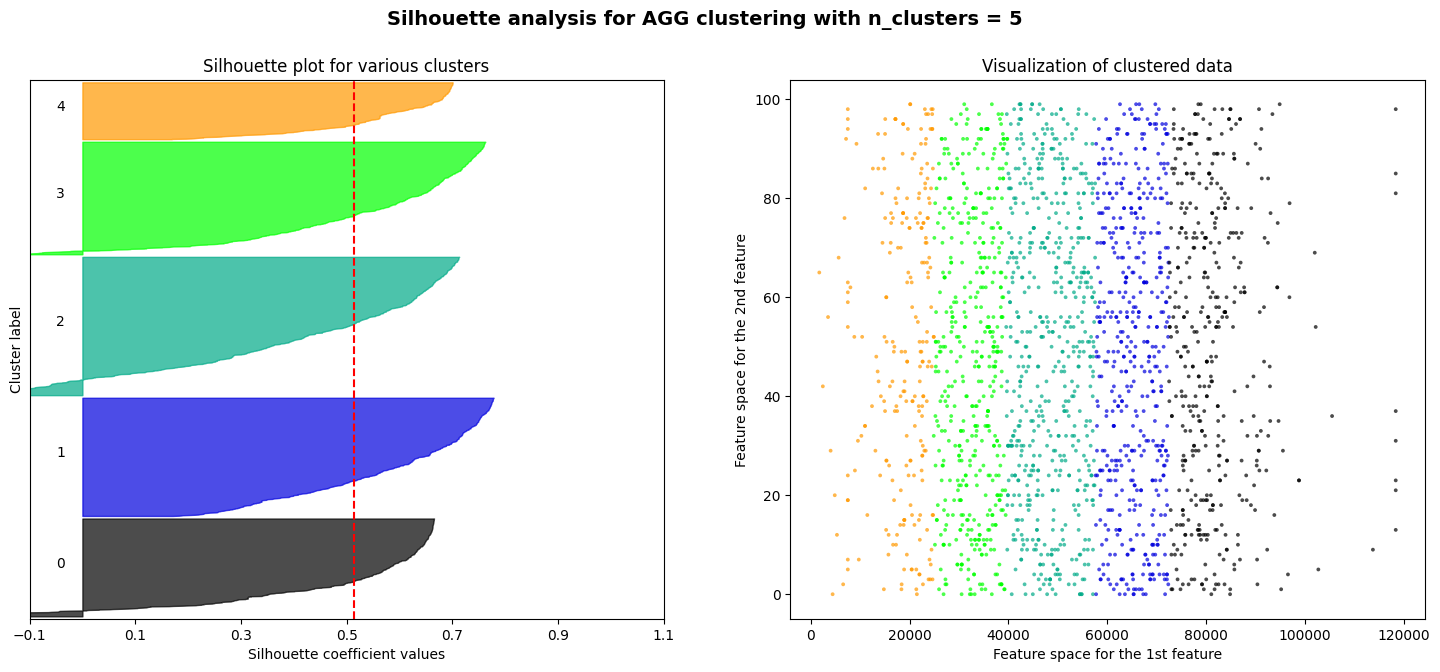

For n_clusters = 6, The average silhouette_score is: 0.5108


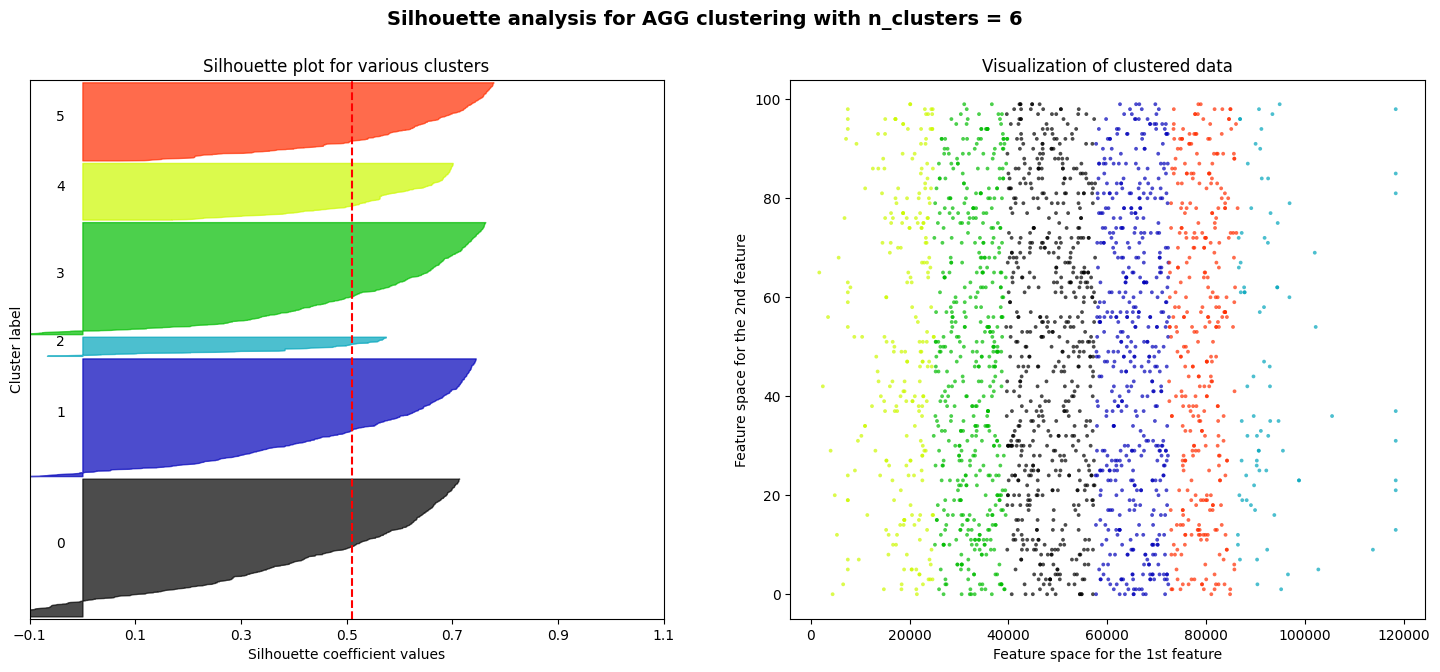

In [15]:
aglo_result=silhouette_analysis(df=df_encoded , model="agg")

In [16]:
kmeans=KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300, n_init= 10, algorithm='lloyd' )
cluster_lables=kmeans.fit_predict(df_encoded)
df["Cluster"]=cluster_lables
count=df["Cluster"].value_counts()

In [17]:
cluster_count=count.reset_index()

In [18]:
cluster_count

,Cluster,count
0,2,781
1,0,737
2,1,698


C:\Users\RJ\AppData\Local\Temp\ipykernel_11532\557991390.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


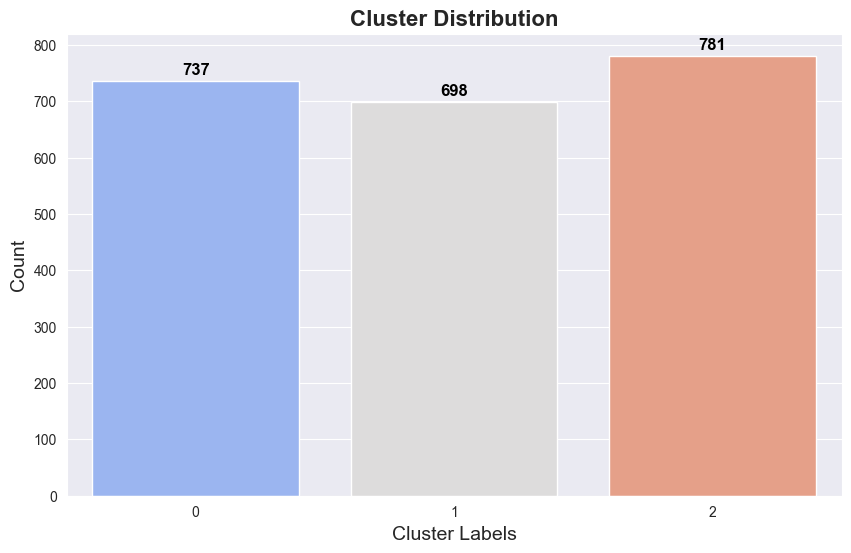

In [19]:
# Set Seaborn style and color palette
sns.set_style("darkgrid")  # Better visibility
sns.set_palette("husl")  # Vibrant color mapping

# Create bar plot with enhanced aesthetics
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=cluster_count["Cluster"],
    y=cluster_count["count"],
    palette=sns.color_palette("coolwarm", len(cluster_count))
)

# Customize labels and title
ax.set_title("Cluster Distribution", fontsize=16, fontweight="bold")
ax.set_xlabel("Cluster Labels", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Display values on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, fontweight="bold", color="black",
                xytext=(0, 8), textcoords='offset points')

plt.show()


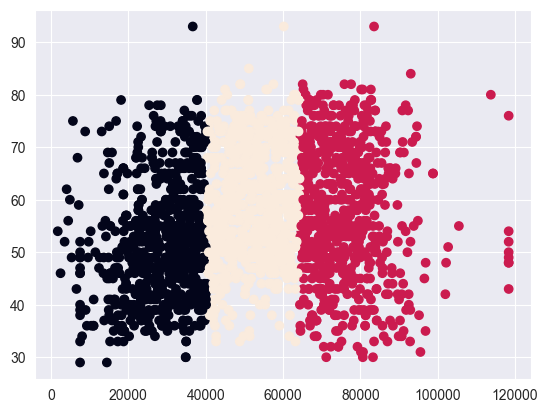

In [20]:
plt.scatter(x=df["Income"] , y=df["Age"] , c=df["Cluster"])

In [21]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'wines', 'fruits',
       'meat', 'fist', 'sweets', 'golds', 'DealsPurchases', 'onlinePurchases',
       'CatalogPurchases', 'StorePurchases', 'NumWebVisitsMonth',
       'month_enroll', 'Generation', 'Age', 'Childrens',
       'Compaigns_Engagement', 'Income_to_Spending_Ratio', 'Cluster'],
      dtype='object')

Text(0, 0.5, 'Total Spendings')

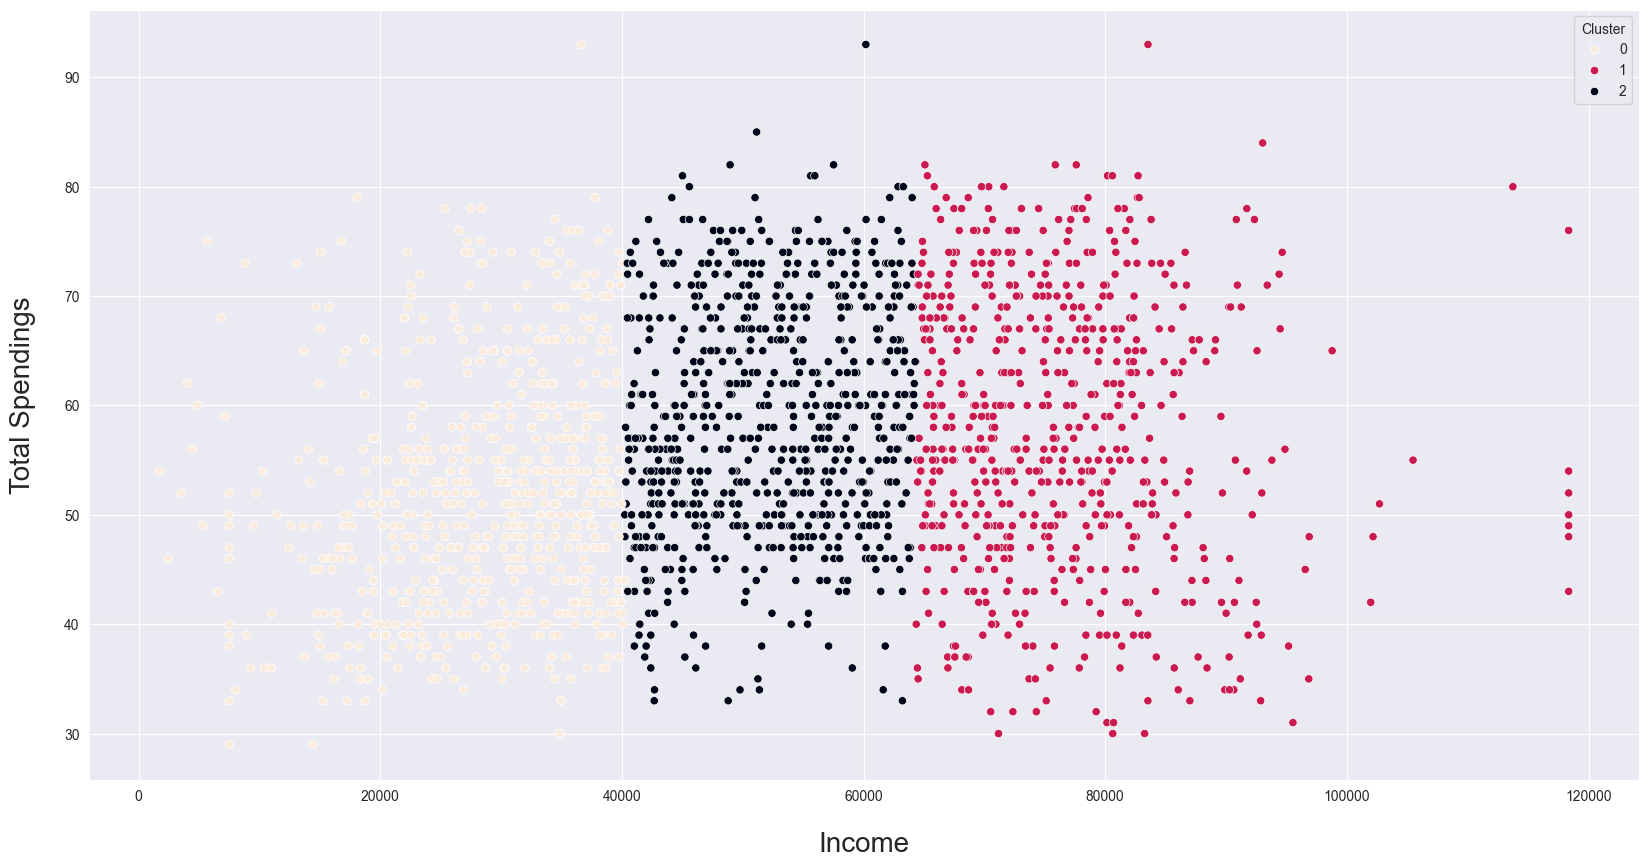

In [22]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x='Income', y='Age', hue='Cluster', palette='rocket_r')
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20)